# EDA on flood dataset

In [ ]:
#pip install sweetwiz

In [21]:
# Importing libraries
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [12]:
# Loading the data
df_flood = pd.read_csv("Flood Data.csv")

In [3]:
# Checking first 5 records
df_flood.head()

,City,State,Geo.ID,Risk,Vulnerability,Exposure,Sensitivity,Adaptive Capacity,Readiness,Social,Governance,Economic,Historical Average Cost of Flood Event,Projected Cost of Flood Event,Probability of Flood Event in 2040,Probability of a flood between 2019 and 2040
0,Abilene,TX,1600000US4801000,0.699359,0.574714,0.824003,0.478739,0.329311,0.314172,0.120899,0.220609,0.601007,0.000000e+00,1.999522e+05,0.002732,0.054644
1,Akron,OH,1600000US3901000,0.289344,0.410390,0.168297,0.603873,0.783093,0.507762,0.514565,0.514348,0.494373,1.057254e+06,9.434973e+05,0.000000,0.000000
2,Albuquerque,NM,1600000US3502000,0.287200,0.454036,0.120363,0.495268,0.587196,0.631972,0.317515,0.795843,0.782557,5.389568e+04,6.443253e+05,0.002732,0.054644
3,Alexandria,VA,1600000US5101000,0.357486,0.426807,0.288165,0.410568,0.556953,0.523200,0.362578,0.609321,0.597701,3.571429e+03,2.562188e+07,0.000000,0.000000
4,Allentown,PA,1600000US4202000,0.547926,0.683385,0.412468,0.700655,0.333885,0.393285,0.425955,0.245751,0.508149,1.250000e+04,3.395898e+06,0.000000,0.000000


In [4]:
df_flood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   City                                          278 non-null    object 
 1   State                                         278 non-null    object 
 2   Geo.ID                                        278 non-null    object 
 3   Risk                                          278 non-null    float64
 4   Vulnerability                                 278 non-null    float64
 5   Exposure                                      278 non-null    float64
 6   Sensitivity                                   278 non-null    float64
 7   Adaptive Capacity                             278 non-null    float64
 8   Readiness                                     278 non-null    float64
 9   Social                                        278 non-null    flo

In [7]:
# Checking null values
df_flood.isnull().sum()

City                                             0
State                                            0
Geo.ID                                           0
Risk                                             0
Vulnerability                                    0
Exposure                                         0
Sensitivity                                      0
Adaptive Capacity                                0
Readiness                                        0
Social                                           0
Governance                                       0
Economic                                         0
Historical Average Cost of Flood Event          26
Projected Cost of Flood Event                    0
Probability of Flood Event in 2040               6
Probability of a flood between 2019 and 2040     0
dtype: int64

In [17]:
# Missing values (checking the percentage of NAN values present in each feature)
# Make the list of features which has missing values

features_with_nan = [features for features in df_flood.columns if df_flood[features].isnull().sum()>1]

# Print feature name and % of missing value
for feature in features_with_nan:
    print(feature,np.round(df_flood[feature].isnull().mean(), 4), '% missing value')

Historical Average Cost of Flood Event 0.0935 % missing value
Probability of Flood Event in 2040 0.0216 % missing value


In [22]:
# Finding corelation
df_flood.corr()

,Risk,Vulnerability,Exposure,Sensitivity,Adaptive Capacity,Readiness,Social,Governance,Economic,Historical Average Cost of Flood Event,Projected Cost of Flood Event,Probability of Flood Event in 2040,Probability of a flood between 2019 and 2040
Risk,1.000000,0.447936,0.899202,0.185397,-0.390602,-0.190018,-0.166160,-0.214441,-0.023269,-0.043800,-0.047543,-0.029156,-0.032247
Vulnerability,0.447936,1.000000,0.011601,0.501656,-0.812920,-0.404371,-0.357799,-0.464209,-0.037974,-0.046698,-0.041197,0.007223,0.016206
Exposure,0.899202,0.011601,1.000000,-0.038148,-0.039031,-0.014629,-0.010737,-0.012660,-0.007441,-0.027300,-0.033012,-0.036394,-0.043997
Sensitivity,0.185397,0.501656,-0.038148,1.000000,0.095988,-0.185947,-0.158871,-0.229581,-0.009856,0.048468,0.000509,-0.037413,-0.028996
Adaptive Capacity,-0.390602,-0.812920,-0.039031,0.095988,1.000000,0.340103,0.304745,0.379581,0.037059,0.085425,0.047746,-0.033701,-0.038167
Readiness,-0.190018,-0.404371,-0.014629,-0.185947,0.340103,1.000000,0.737024,0.737184,0.616328,-0.043730,0.079383,-0.055536,-0.047385
Social,-0.166160,-0.357799,-0.010737,-0.158871,0.304745,0.737024,1.000000,0.388960,0.074208,0.020979,0.033376,0.071935,0.081194
Governance,-0.214441,-0.464209,-0.012660,-0.229581,0.379581,0.737184,0.388960,1.000000,0.232172,0.029621,0.063698,-0.020478,-0.010019
Economic,-0.023269,-0.037974,-0.007441,-0.009856,0.037059,0.616328,0.074208,0.232172,1.000000,-0.138259,0.072708,-0.179783,-0.181429
Historical Average Cost of Flood Event,-0.043800,-0.046698,-0.027300,0.048468,0.085425,-0.043730,0.020979,0.029621,-0.138259,1.000000,-0.009180,-0.031837,-0.029388


<AxesSubplot:>

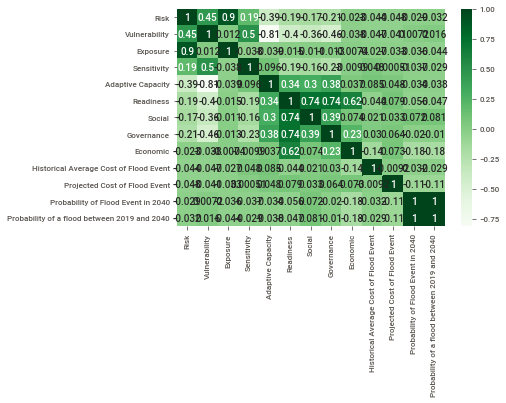

In [32]:
# Heat map
sns.heatmap(df_flood.corr(), annot = True, cmap='Greens')

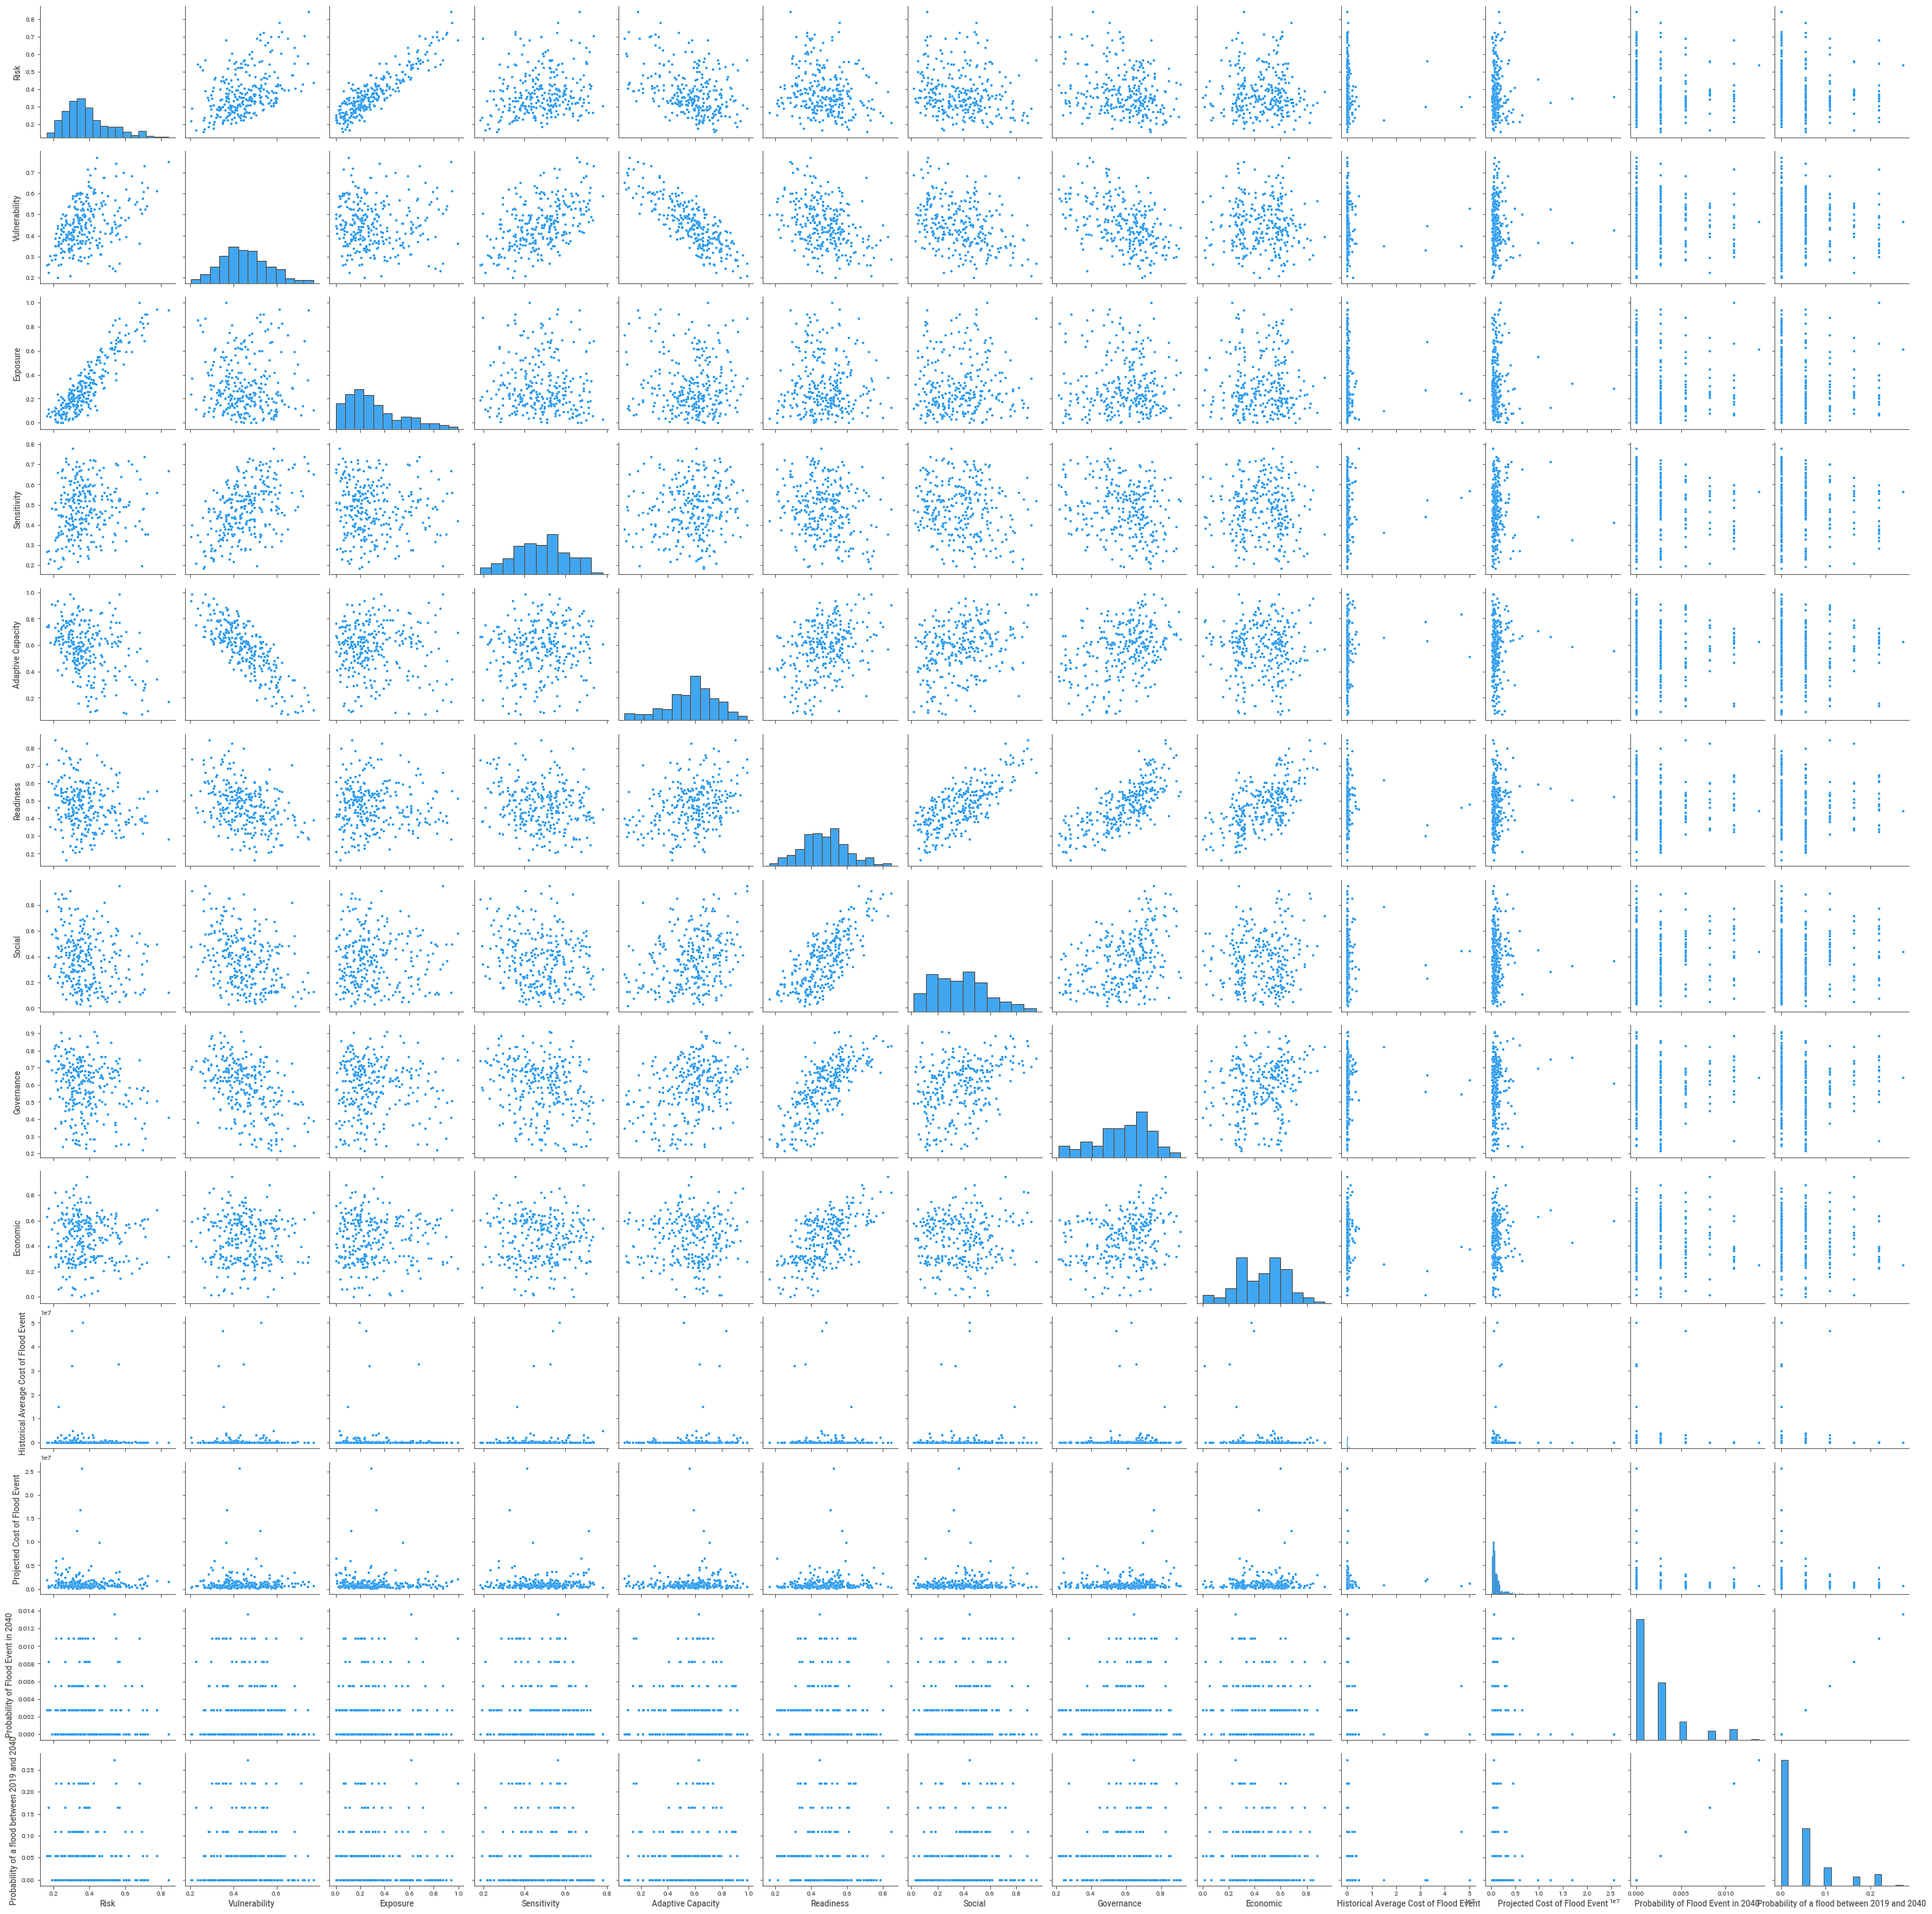

In [27]:
# Pairplots
sns.pairplot(df_flood)

# Quick Analysis using Sweetviz

In [5]:
# Analyzing flood data
flood_reports=sv.analyze(df_flood)
# Generating report
flood_reports.show_html('eda_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



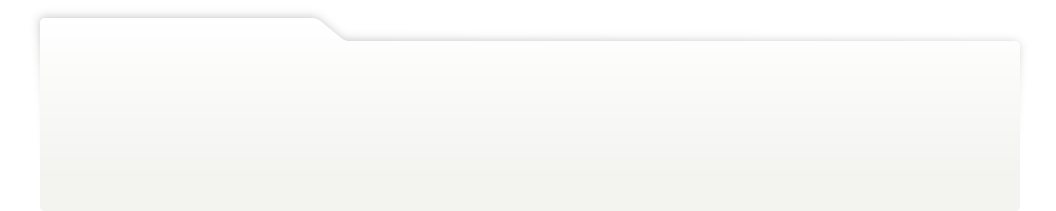
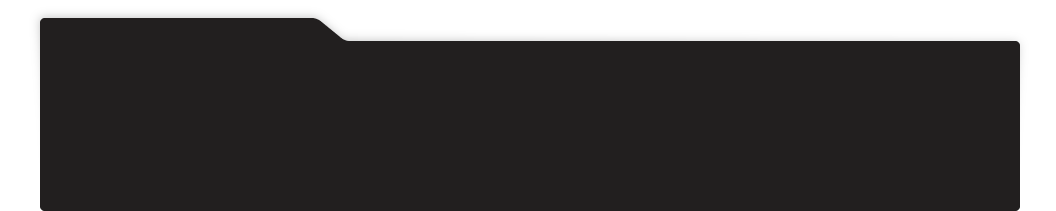
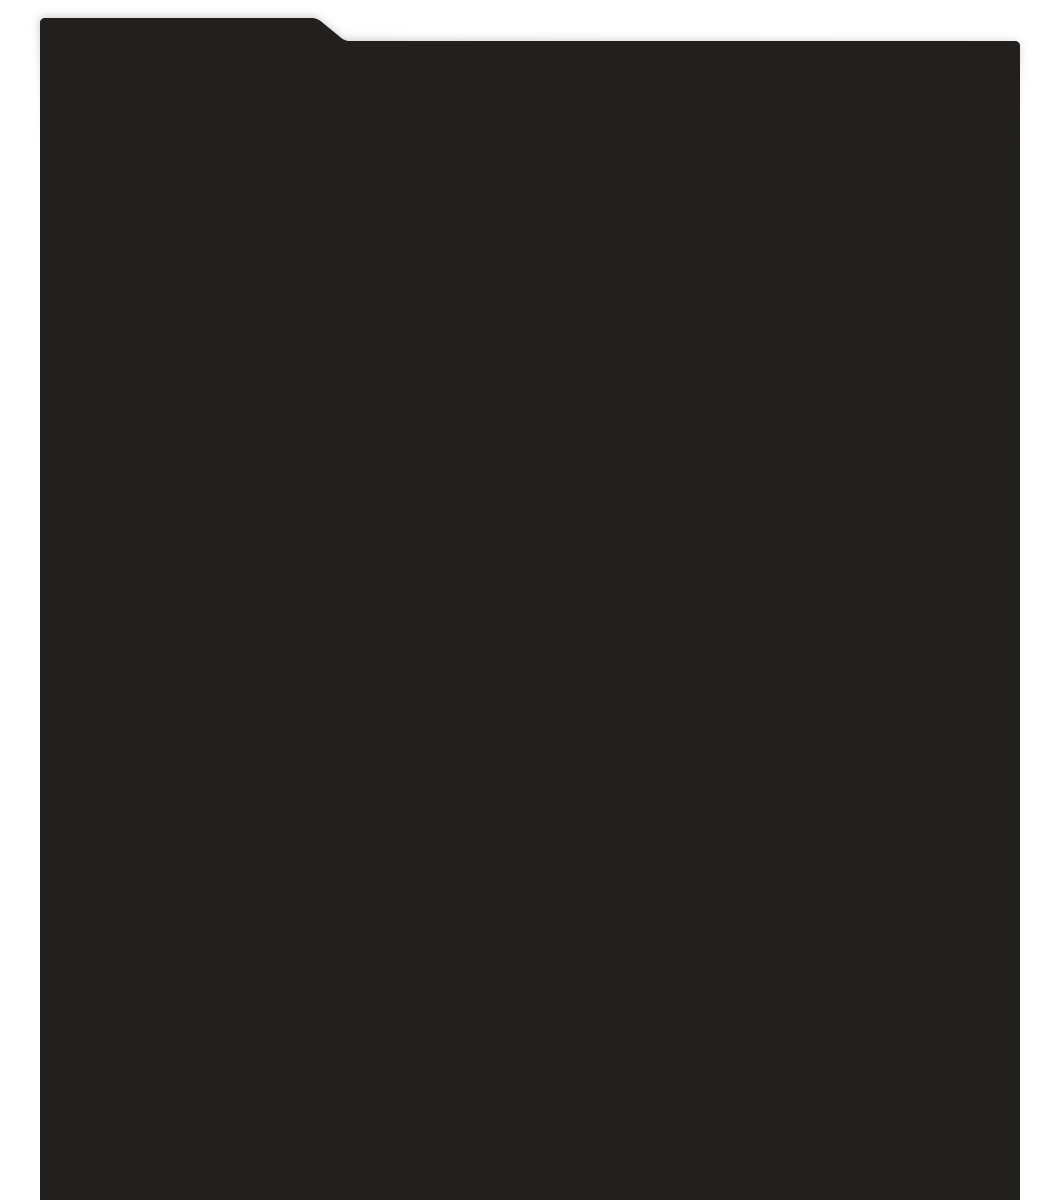
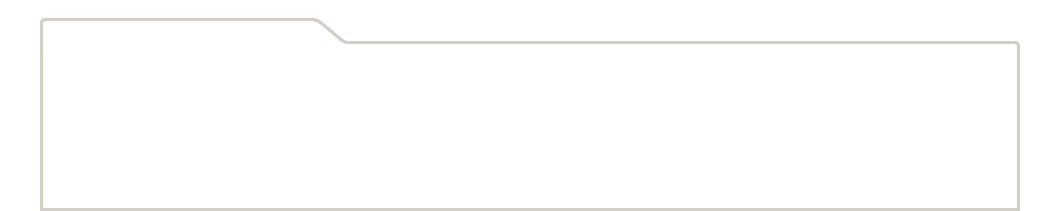
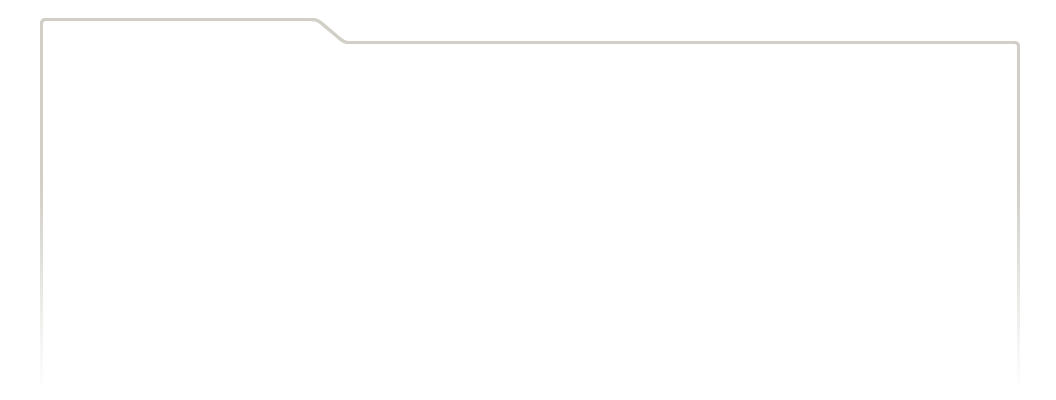
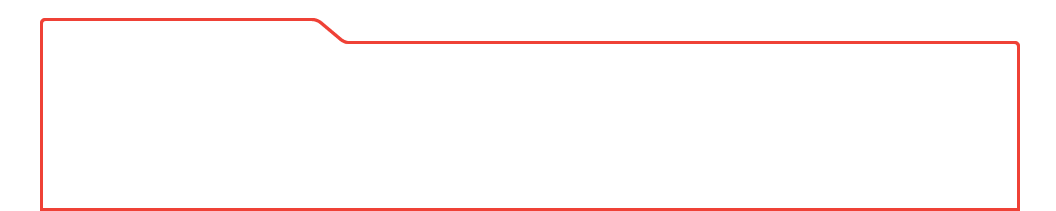
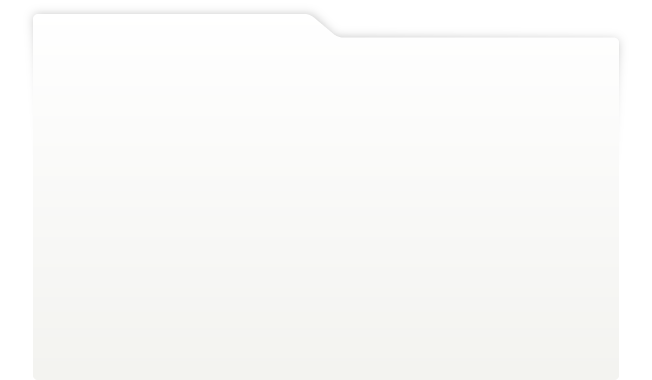
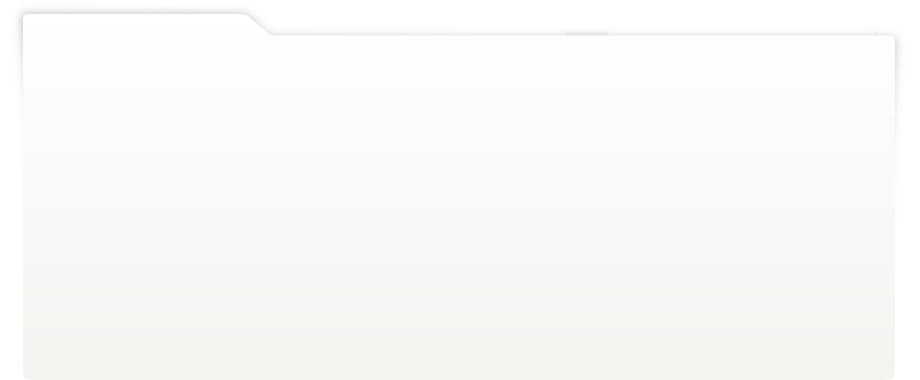
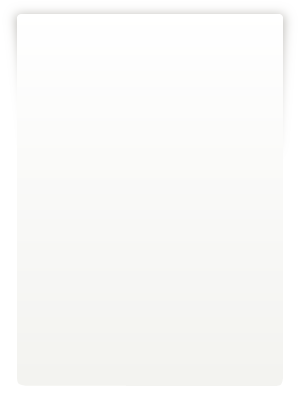
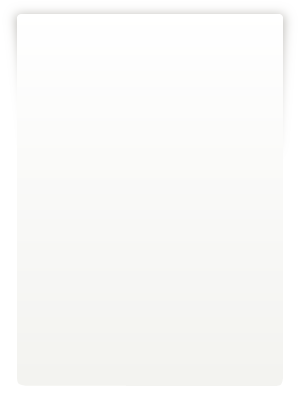
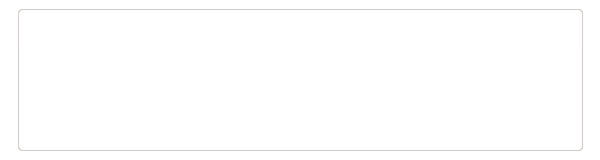
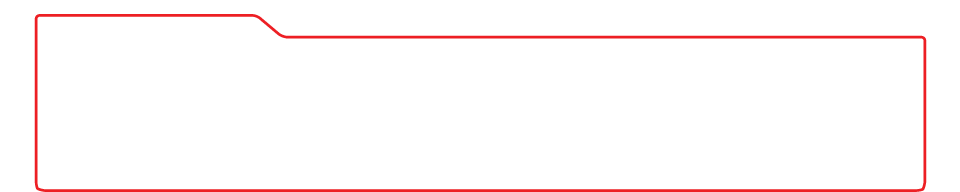
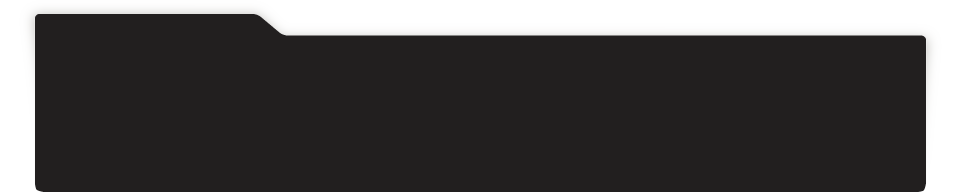
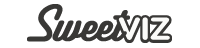
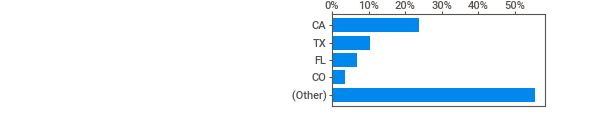
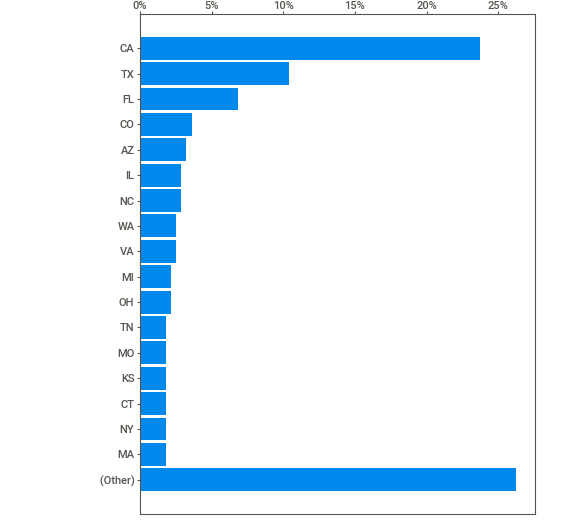
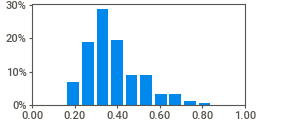
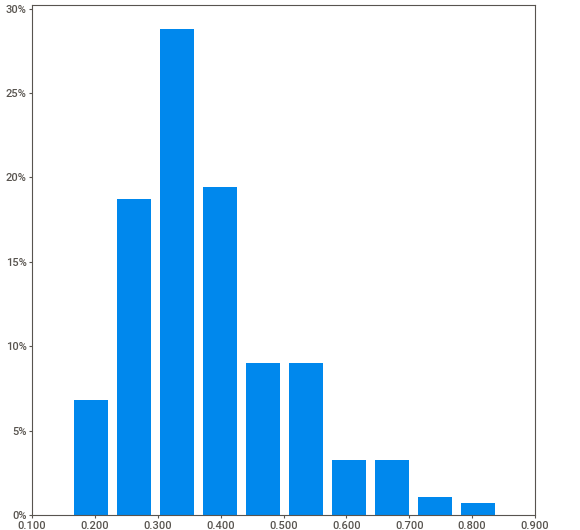
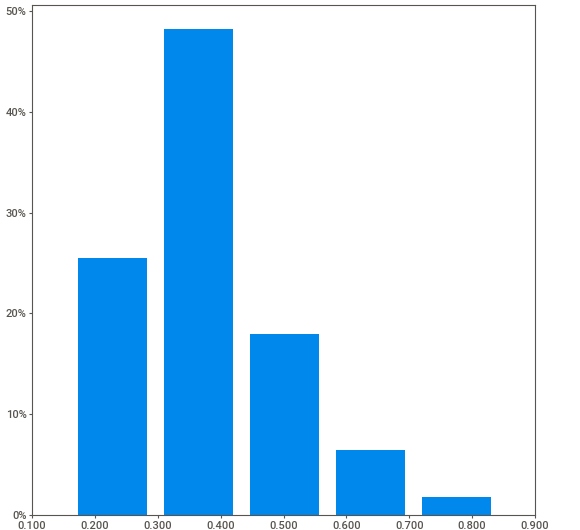
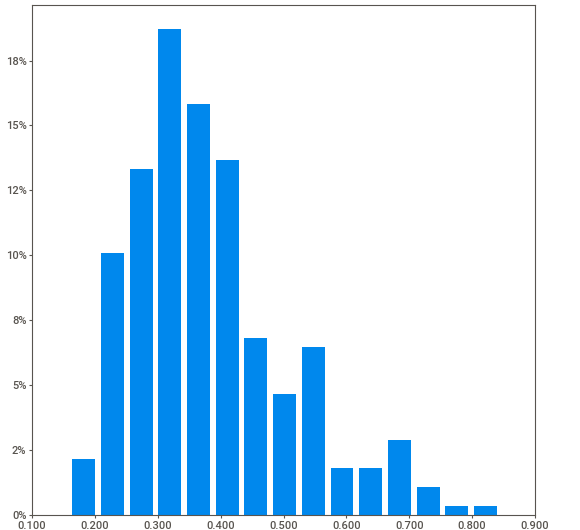
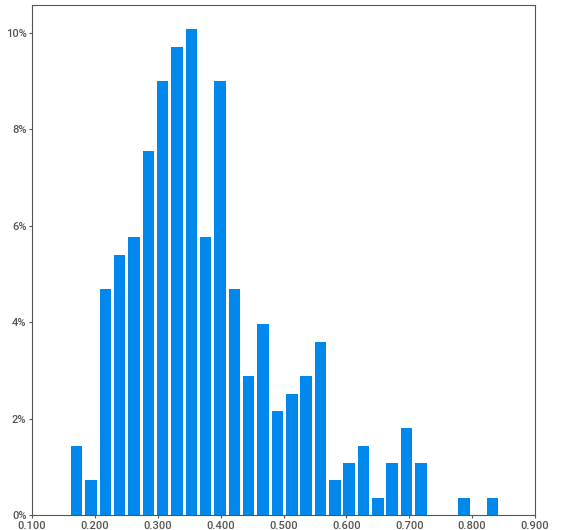
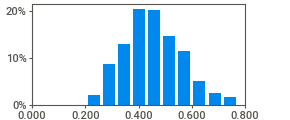
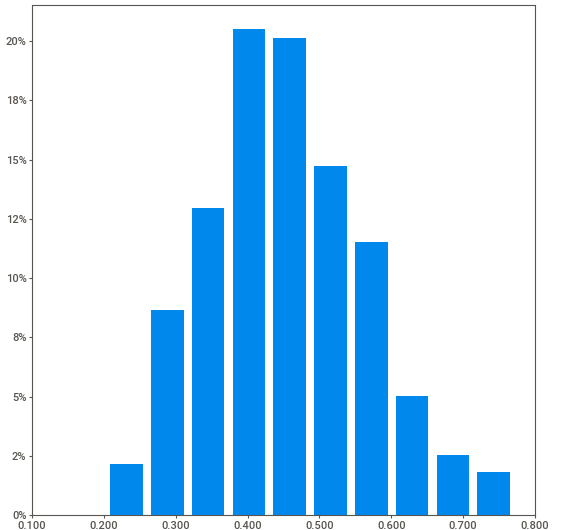
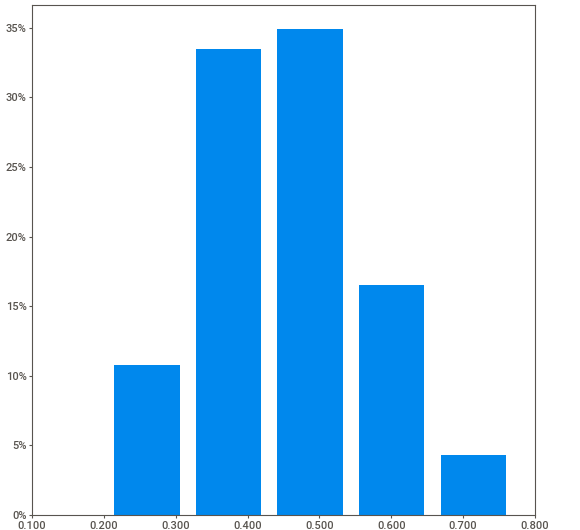
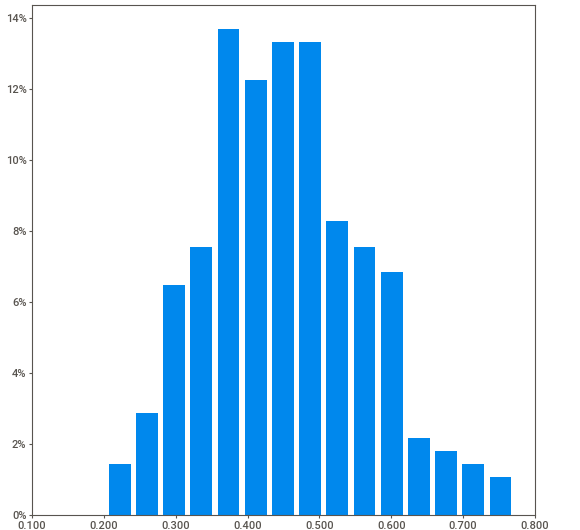
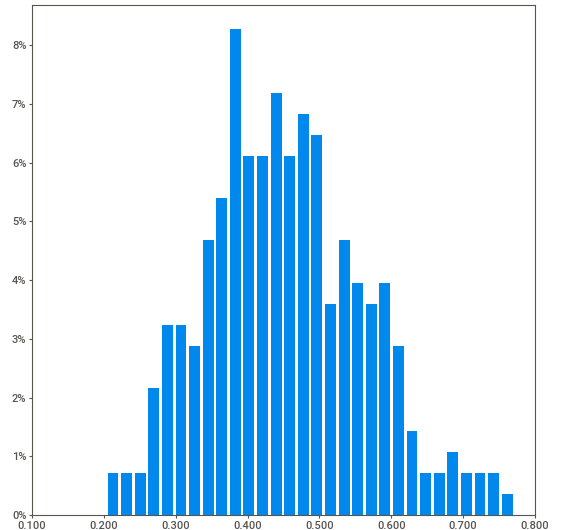
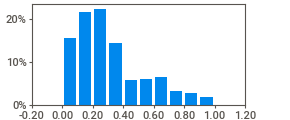
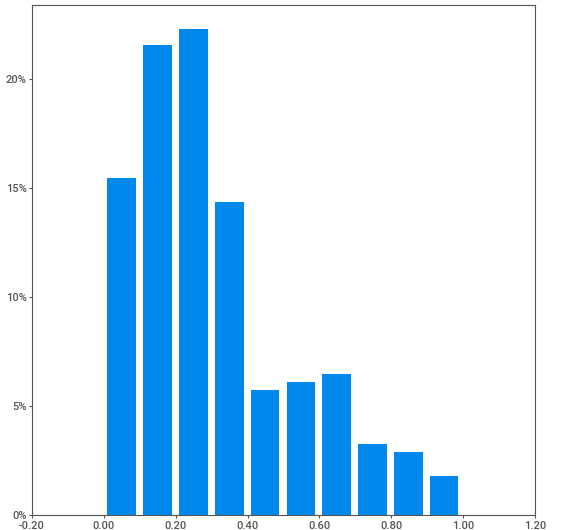
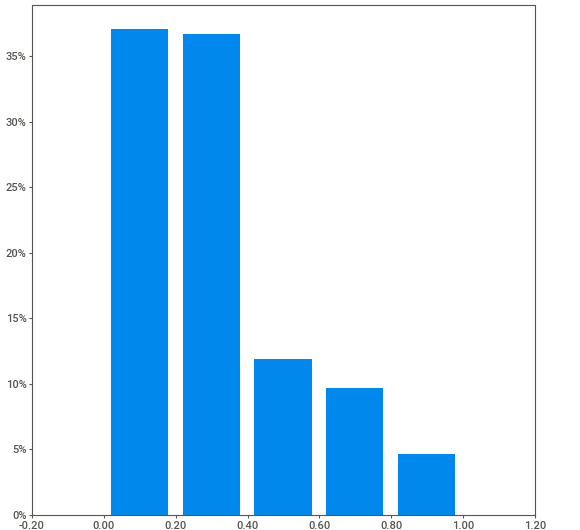
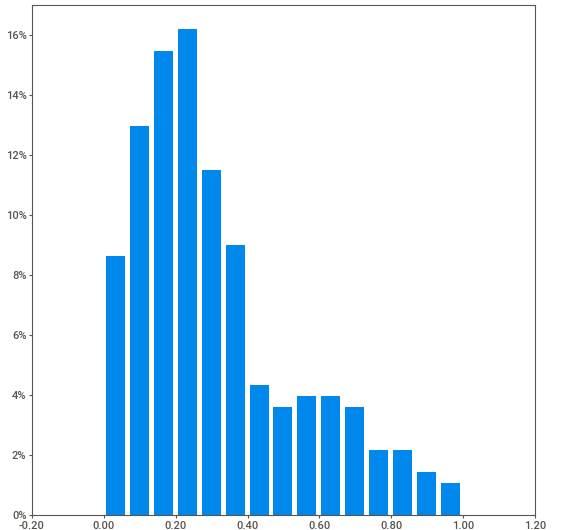
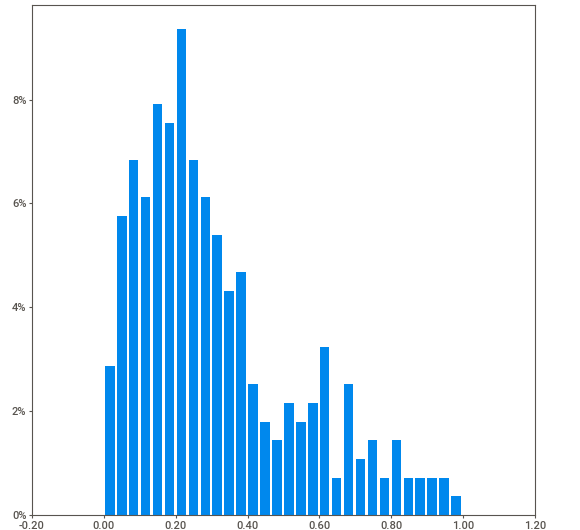
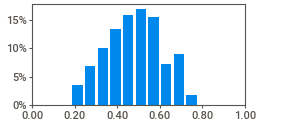
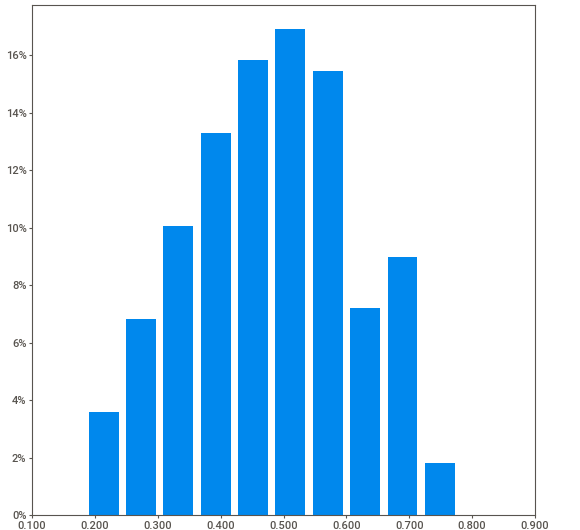
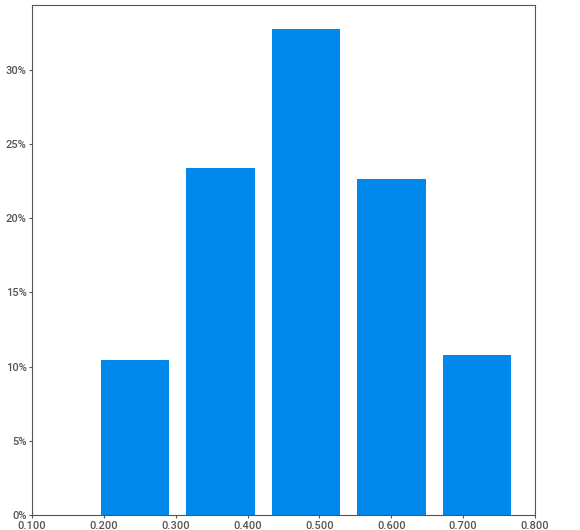
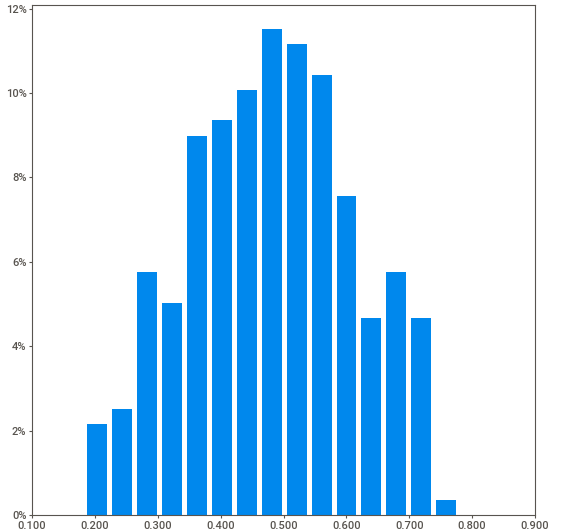
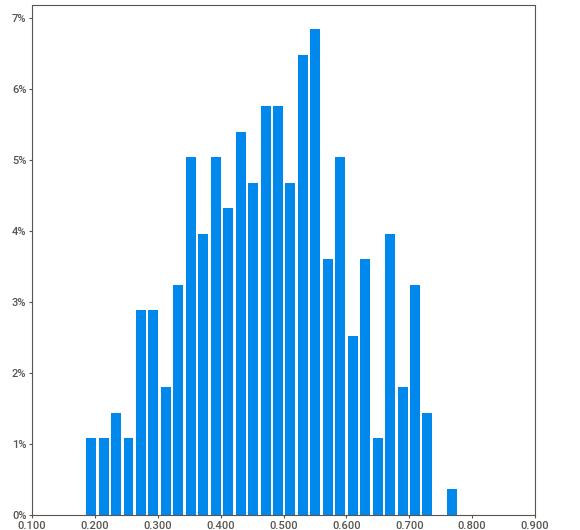
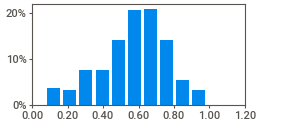
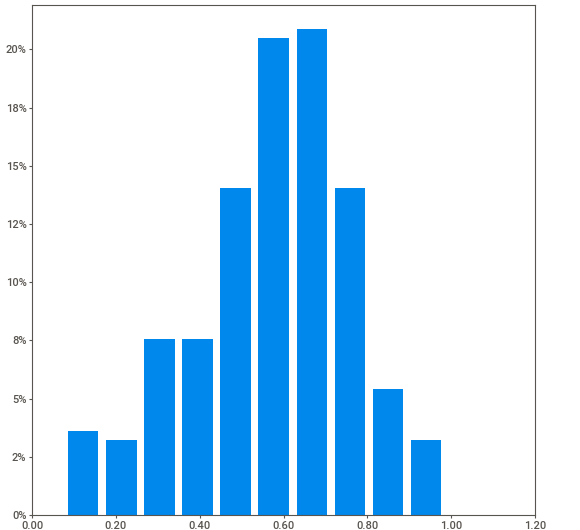
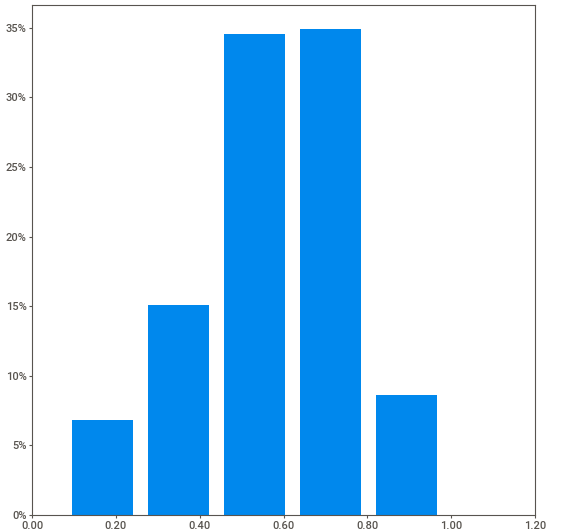
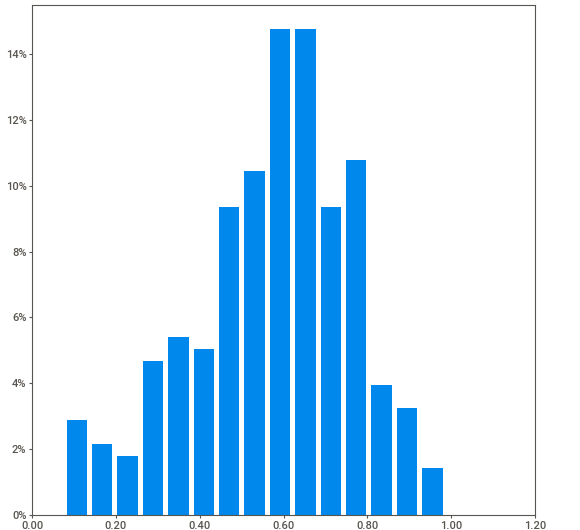
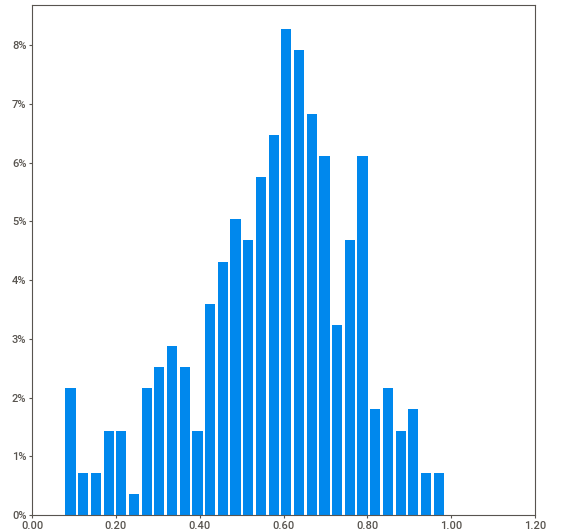
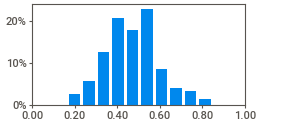
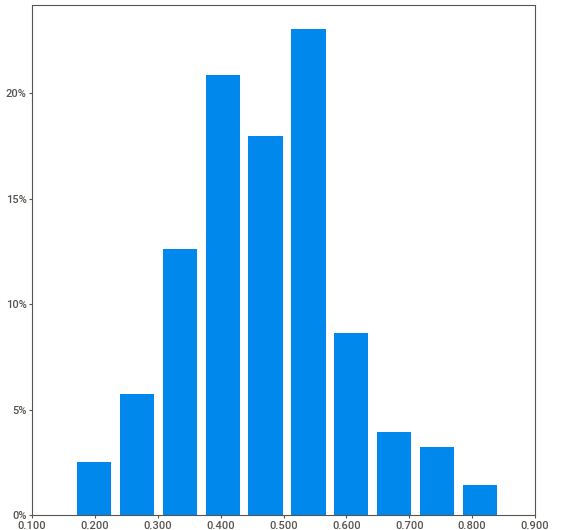
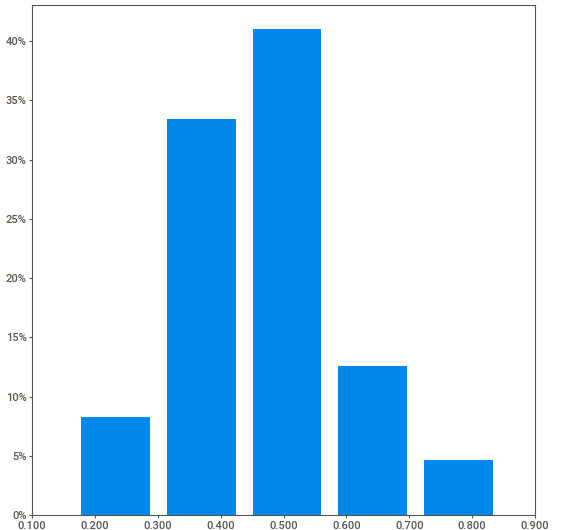
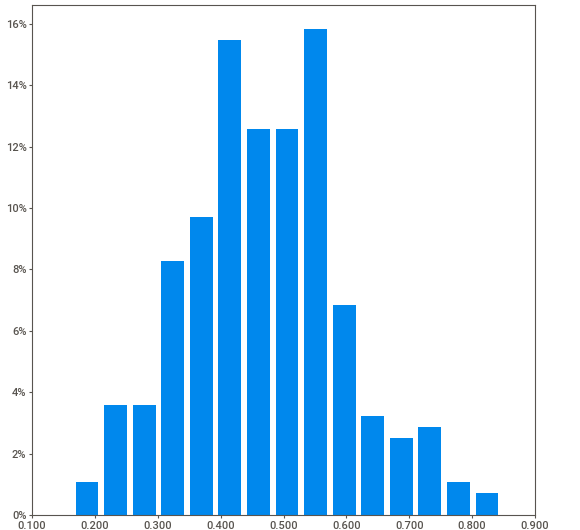
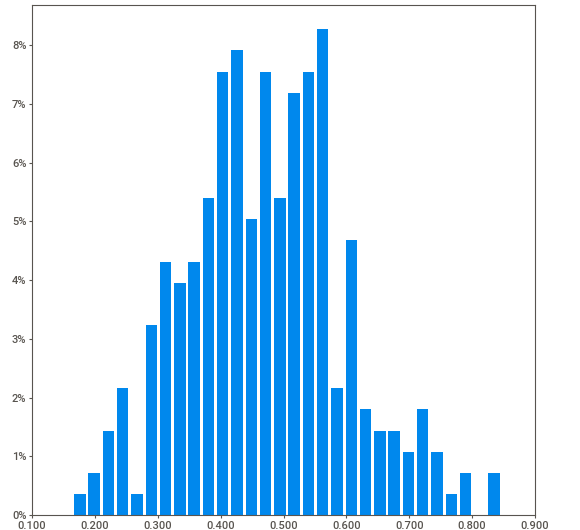
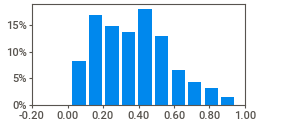
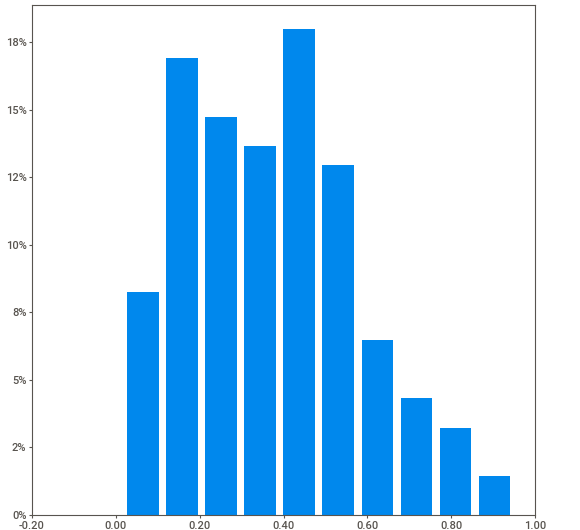
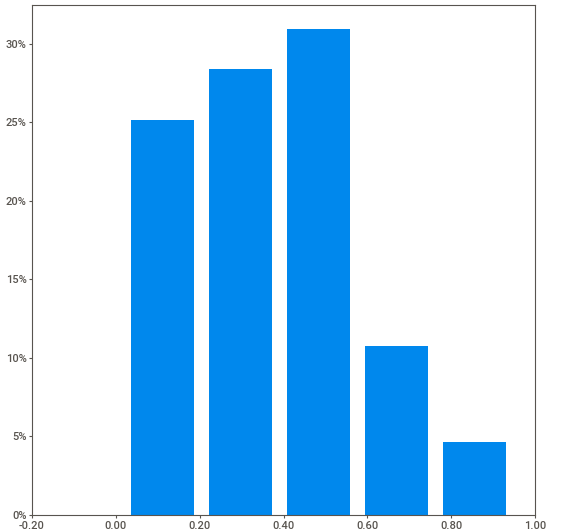
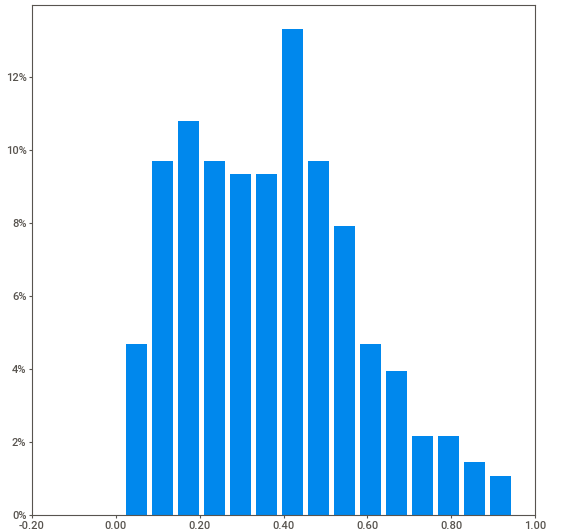
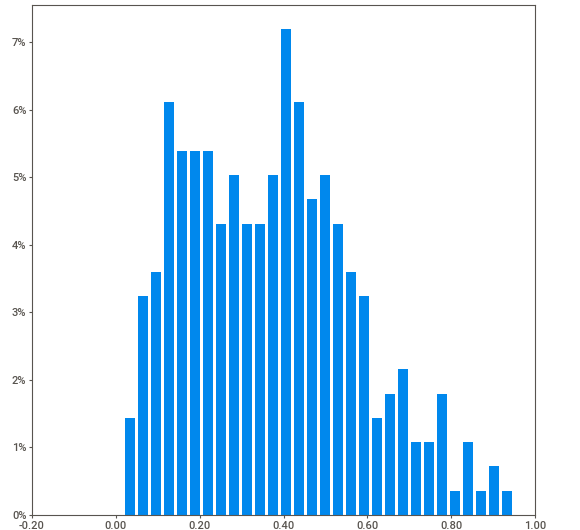
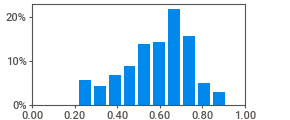
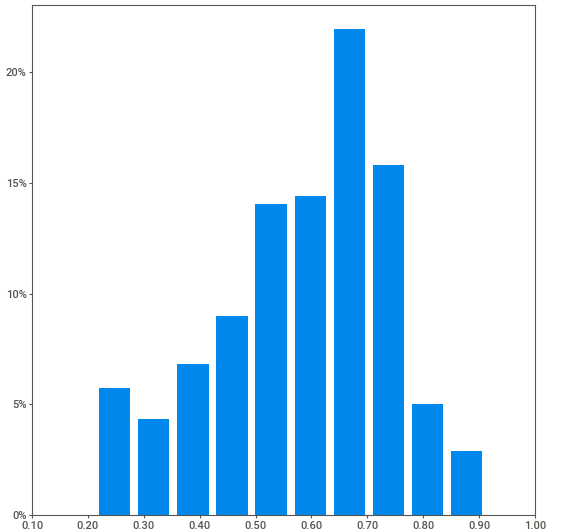
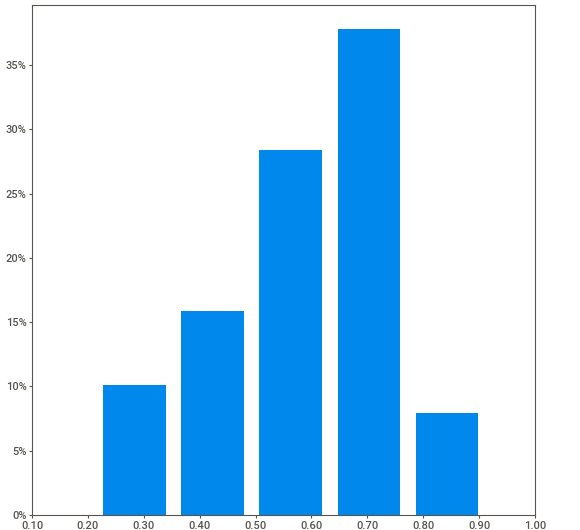
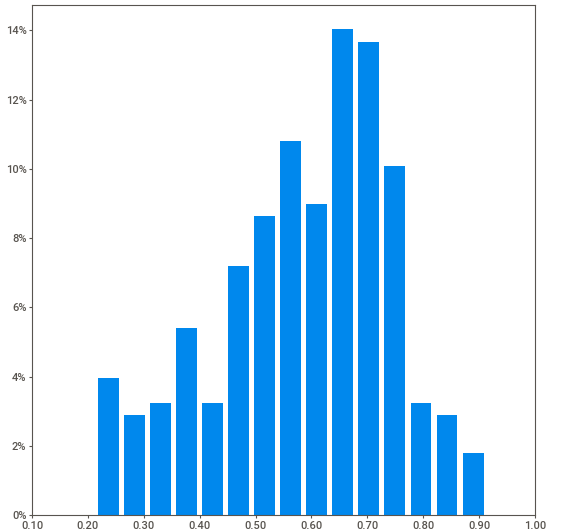
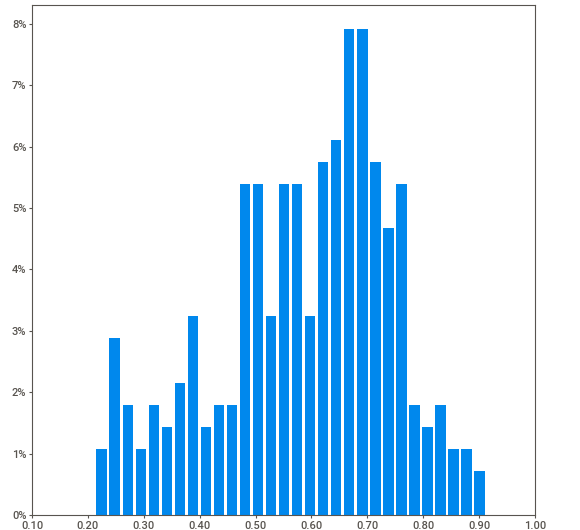
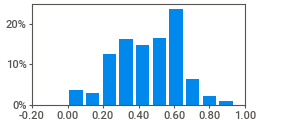
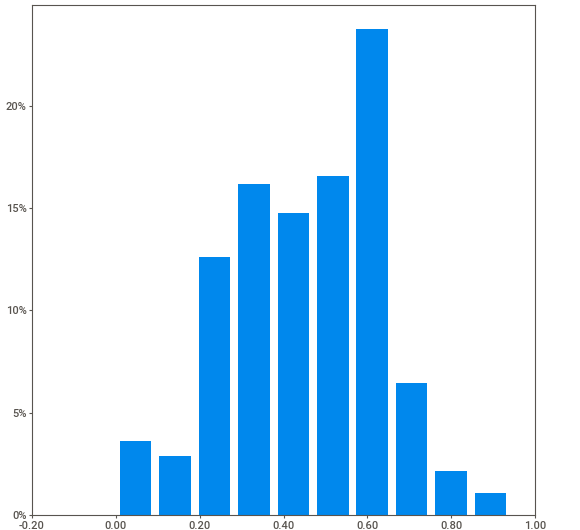
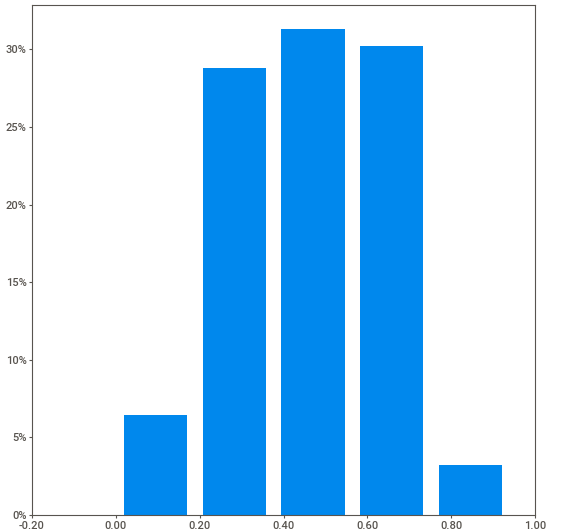
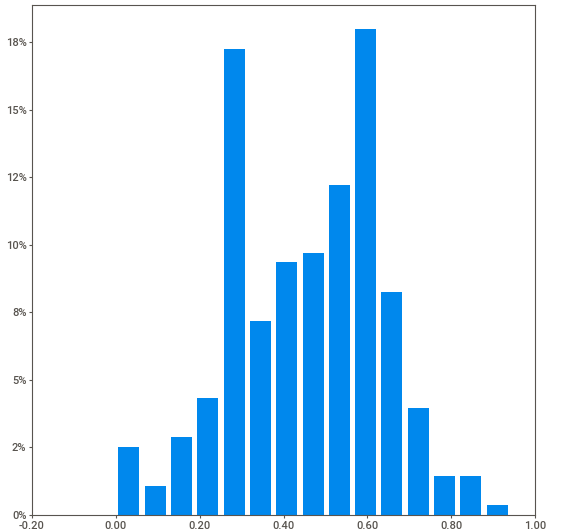
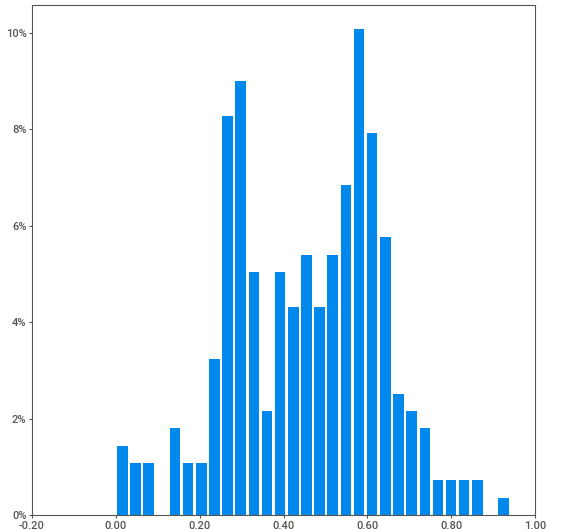
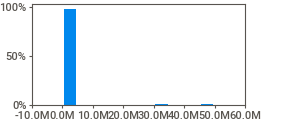
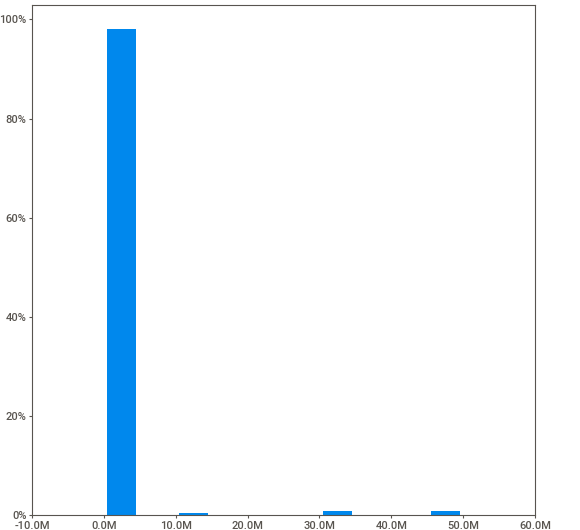
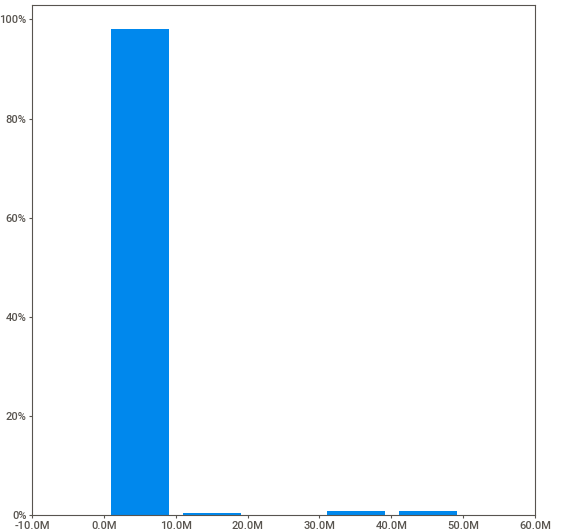
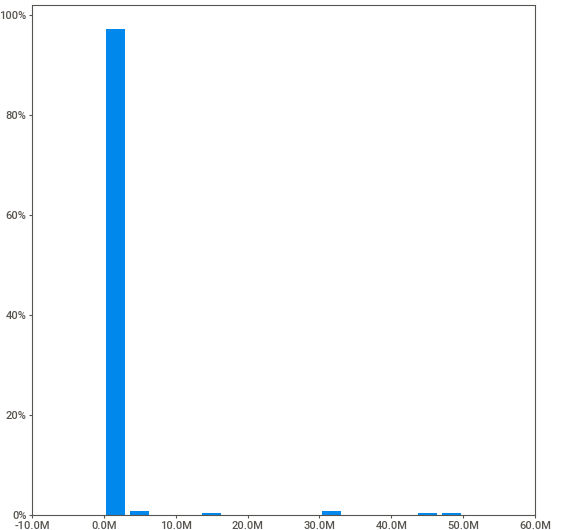
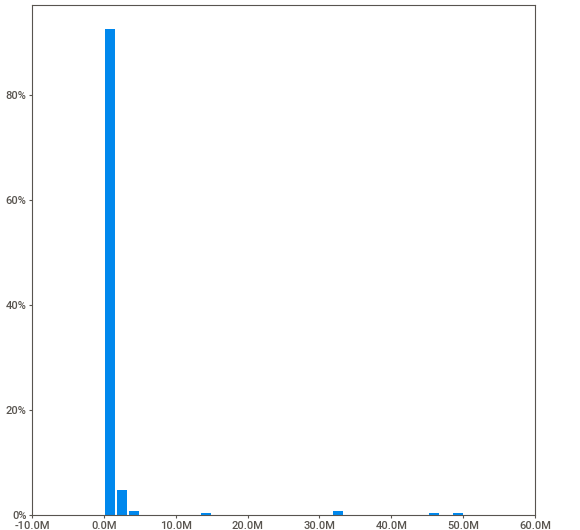
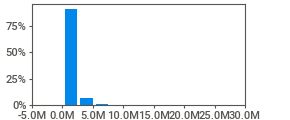
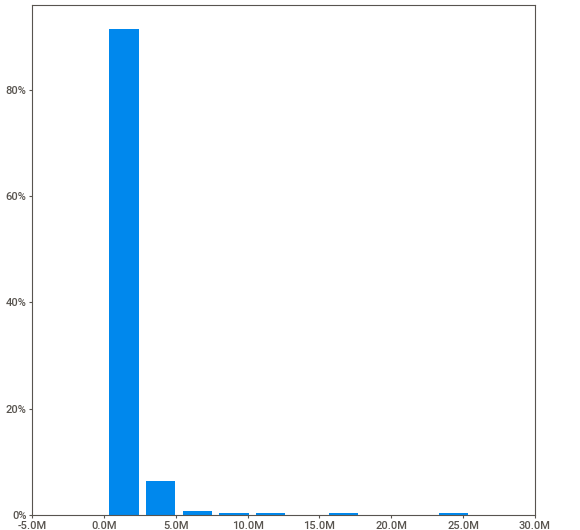
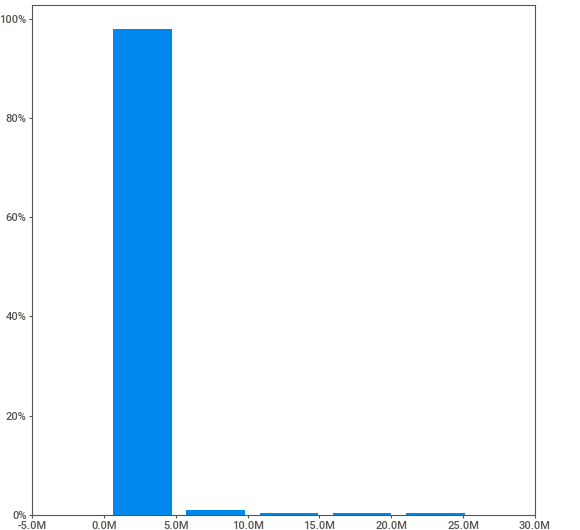
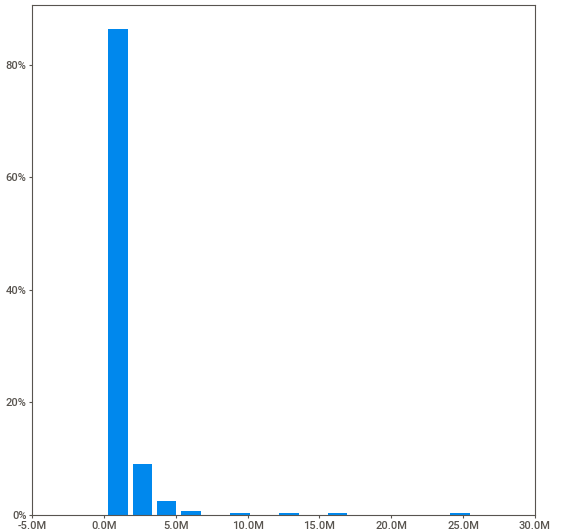
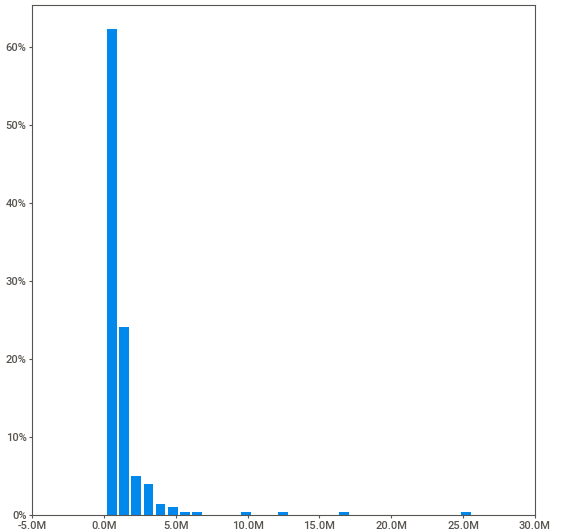
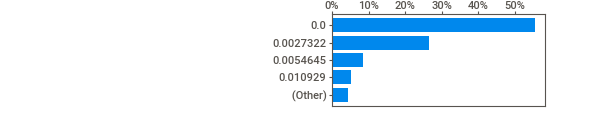
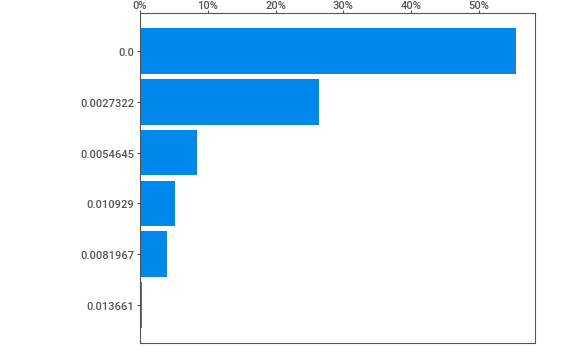
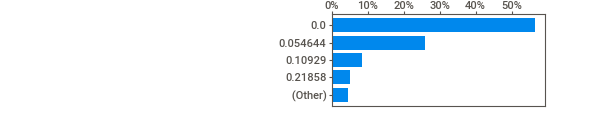
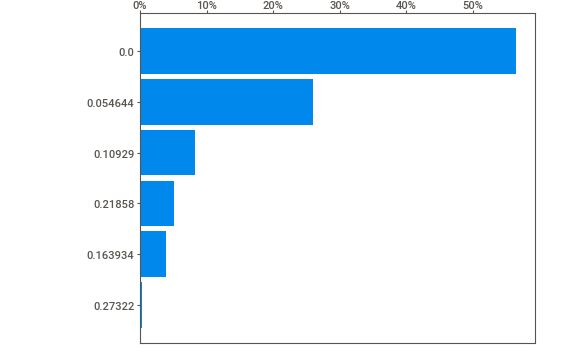
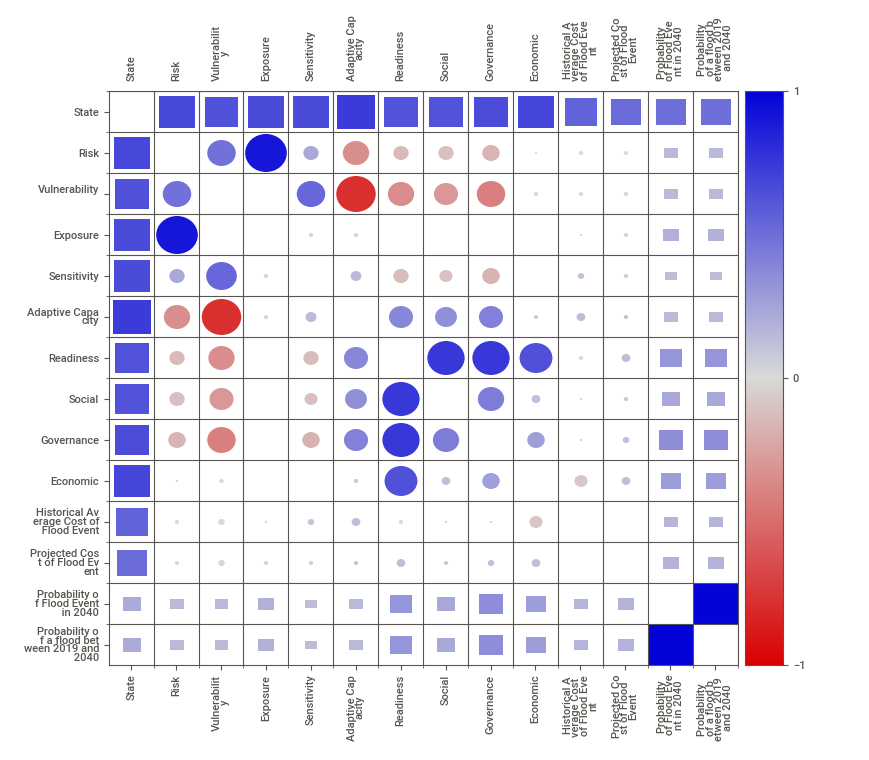
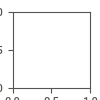

In [18]:
flood_reports.show_notebook(w=None, h=None)


# Quick analysis using dtale

In [ ]:
#pip install dtale

In [43]:
import dtale

In [46]:
dtale.show(df_flood)
# You can get whole lot of deatils by clicking on your selected attribute

In [44]:
dtale.show(df_flood)

In [45]:
dtale.show(df_flood)

C:\Users\Deepali Bidwai\anaconda3\envs\tensorflow\lib\site-packages\dtale\views.py:1697: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Deepali Bidwai\anaconda3\envs\tensorflow\lib\site-packages\dtale\views.py:1697: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Deepali Bidwai\anaconda3\envs\tensorflow\lib\site-packages\dtale\views.py:1697: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Deepali Bidwai\anaconda3\envs\tensorflow\lib\site-packages\dtale\views.py:1697: FutureWarning:

The default value of regex will change from True to False in a future version.

